# image-classifier

In [1]:
import os
import tensorflow as tf
import abcli
from abcli import *
from abcli import string
from abcli.plugins import gpu
import image_classifier
from image_classifier.model import Image_Classifier
from abcli import logging
import logging

logger = logging.getLogger(__name__)

logger.info(f"using {abcli.fullname()}, {image_classifier.name}-{image_classifier.version}")
logger.info(f"{os.environ.get('abcli_object_name')} - built on {string.pretty_date()}")

gpu.validate();

using abcli-1.1.477-main, image_classifier-1.1.68
2022-07-06-20-12-58-57931 - built on 07 July 2022, 22:30:31
TensorFlow: 2.6.0
0 GPU(s) available: [].


In [2]:
validation = True

# abs sel ic_input_object_v2; abc ic ing
data_path = os.path.join(os.getenv("abcli_object_root"),"ic_input_object_v2")
model_path = os.path.join(os.getenv("abcli_object_root"),string.random_(16))

initial_epochs = 1 if validation else 5
fine_tune_epochs = 1 if validation else 5

---

Found 15000 files belonging to 15 classes.


2022-07-07 22:30:31.700019: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation_layer (Seq (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 15)                19215     
Total params: 4,068,786
Trainable params: 19,215
Non-trainable params: 4,049,571
_________________________________________________________________
None
Found 4500 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


NumExpr defaulting to 8 threads.
2022-07-07 22:30:38.515461: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


141/141 [==============================] - 315s 2s/step - loss: 0.6742 - accuracy: 0.8860 - val_loss: 0.1757 - val_accuracy: 0.9773
Found 3000 files belonging to 15 classes.
94/94 [==============================] - 119s 1s/step - loss: 0.1878 - accuracy: 0.9783


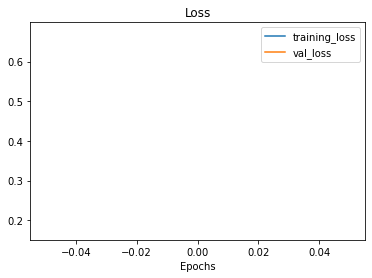

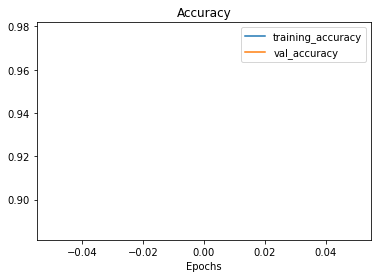

In [3]:
classifier = Image_Classifier(data_path=data_path)
classifier.fit(
    epochs=initial_epochs,
    data_path=data_path, 
    model_path=model_path,
    train_set="train_30")

---

In [4]:
classifier = Image_Classifier(data_path=data_path)
classifier.load_weights(
    data_path=data_path, 
    model_path=model_path,
    evaluate=True)

Found 15000 files belonging to 15 classes.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation_layer (Seq (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 15)                19215     
Total params: 4,068,786
Trainable params: 19,215
Non-trainable params: 4,049,571
_________________________________________________________________
None
Found 3000 files belonging to 15 classes.
94/94 [=============

Found 15000 files belonging to 15 classes.


Cucumber -model-> Cucumber (0.91)


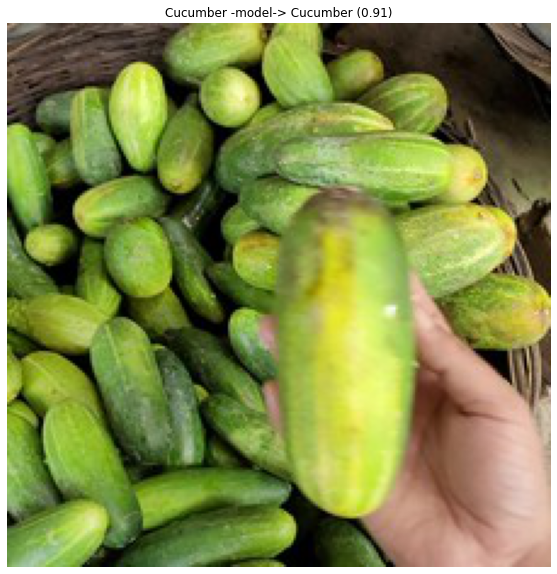

In [11]:
classifier.predict_random_image(data_path=data_path)

END